<h1 style="font-weight: bold; color: #9C6CF9; text-align: center;">Linear Regression</h1>

<h3 style="font-weight: bold; color: #9C6CF9;">Installations</h3>

In [82]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [85]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


<h3 style="font-weight: bold; color: #9C6CF9;">Implementation</h3>

In [86]:
import pandas as pd

In [87]:
from matplotlib import pyplot as plt

In [88]:
df = pd.read_csv("nasdaq100.csv", sep=";")
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [89]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [90]:
df = df.drop(columns=["Date"])
df

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


In [91]:
df.head(10)

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


In [92]:
df

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


Text(0.5, 1.0, 'Stock Prices')

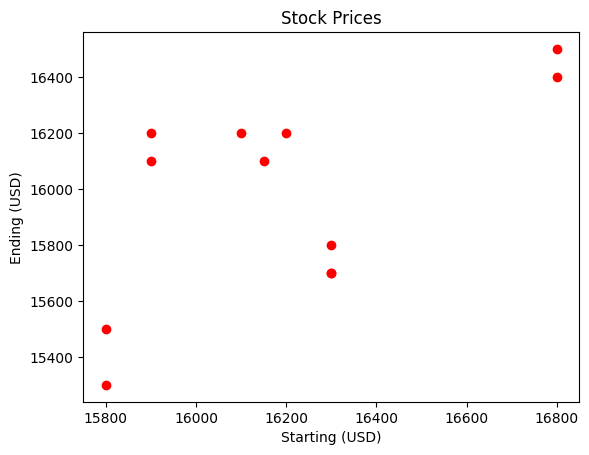

In [93]:
plt.scatter(df["Starting (USD)"],df["Ending (USD)"] , color='red')
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")
plt.title("Stock Prices")

In [94]:
x = df[["Starting (USD)"]]
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [95]:
y= df[["Ending (USD)"]]
y

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700
5,16400
6,16200
7,15500
8,16100
9,15800


Text(0.5, 1.0, 'Stock Prices')

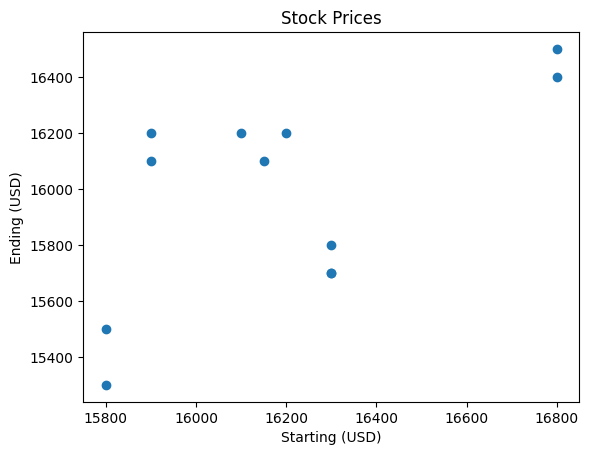

In [96]:
plt.scatter(x,y)
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")
plt.title("Stock Prices")

In [131]:
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier


In [132]:
# reg = LinearRegression()
reg = RandomForestClassifier()

In [133]:
x.mean()

Experience Years    5.1525
dtype: float64

In [134]:

y.mean()

Salary    74743.625
dtype: float64

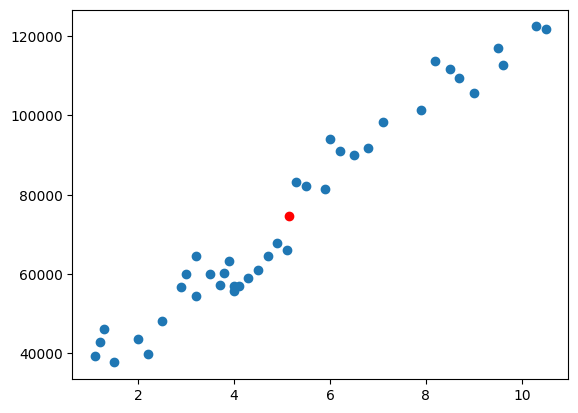

In [135]:
plt.scatter(x.mean(), y.mean(), color= "red")
plt.scatter(x,y)

In [136]:
reg.fit(x,y)

c:\Users\88017\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [137]:
m = reg.coef_

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

In [104]:
c= reg.intercept_

In [105]:
m * 16700 + c


array([[16304.0105628]])

In [138]:
reg.predict([[16700]])

c:\Users\88017\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([121872], dtype=int64)

In [139]:
df["Predicted Y"] = reg.predict(x)
df

,Experience Years,Salary,Predition,Predicted Y
0,1.1,39343,36149.031319,39343
1,1.2,42774,37101.396369,42774
2,1.3,46205,38053.761420,46205
3,1.5,37731,39958.491522,37731
4,2.0,43525,44720.316775,43525
5,2.2,39891,46625.046877,39891
6,2.5,48266,49482.142029,48266
7,2.9,56642,53291.602232,56642
8,3.0,60150,54243.967283,60150
9,3.2,54445,56148.697384,54445


In [140]:
z= df["Predicted Y"]

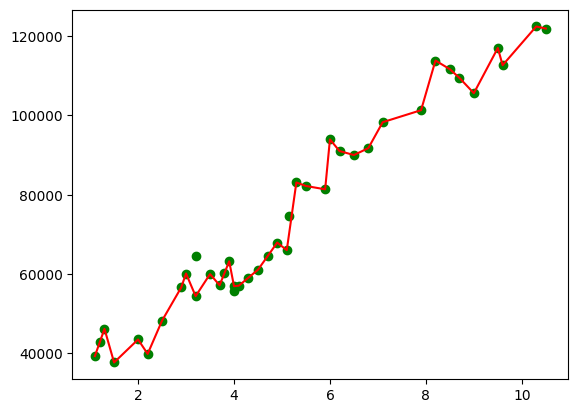

In [141]:
plt.plot(x,z, color="red")
plt.scatter(x,y, color="green")
plt.scatter(x.mean(),y.mean(), color="green")

<h3 style="font-weight: bold; color: #9C6CF9">Lost and Cost Functions</h3>

In [142]:
df

,Experience Years,Salary,Predition,Predicted Y
0,1.1,39343,36149.031319,39343
1,1.2,42774,37101.396369,42774
2,1.3,46205,38053.761420,46205
3,1.5,37731,39958.491522,37731
4,2.0,43525,44720.316775,43525
5,2.2,39891,46625.046877,39891
6,2.5,48266,49482.142029,48266
7,2.9,56642,53291.602232,56642
8,3.0,60150,54243.967283,60150
9,3.2,54445,56148.697384,54445


In [111]:
df["Loss"] = df["Ending (USD)"] - df["Predicted Y"]

df

,Starting (USD),Ending (USD),Predicted Y,Loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389
5,16800,16400,16369.268856,30.731144
6,15900,16200,15781.944215,418.055785
7,15800,15500,15716.685922,-216.685922
8,16150,16100,15945.089949,154.910051
9,16300,15800,16042.977389,-242.977389


In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [148]:
loss = df["Loss"]
p_y = df["Predicted Y"]

KeyError: 'Loss'

In [114]:
mse = mean_squared_error(y,p_y)
mse

80411.23397700385

In [146]:
mae= mean_absolute_error(y,p_y)
mae

ValueError: Found input variables with inconsistent numbers of samples: [40, 12]

In [145]:
loss

0     130.731144
1     318.055785
2    -416.685922
3     287.539198
4    -342.977389
5      30.731144
6     418.055785
7    -216.685922
8     154.910051
9    -242.977389
10    222.280904
11   -342.977389
Name: Loss, dtype: float64

In [144]:
sum(abs(loss)/12)

260.3840017604666

In [143]:
reg.score(x,y)

0.95

<h3 style="font-weight: bold; color: #9C6CF9">Coefficient of Determination (R-Squared)</h3>

In [119]:
from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.3577804940272571

<h3 style="font-weight: bold; color: #9C6CF9;">Assignment</h3>

In [120]:
df = pd.read_csv("Salary Data.csv")
df

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [121]:
x = df[["Experience Years"]]
y = df[["Salary"]]

Text(0, 0.5, 'Salary')

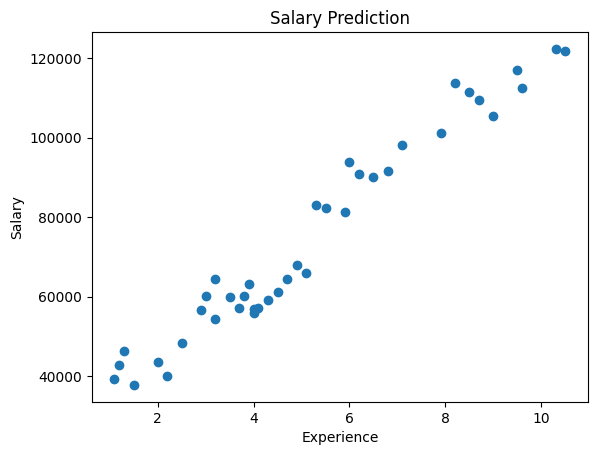

In [122]:
plt.scatter(x,y)
plt.title("Salary Prediction")
plt.xlabel("Experience")
plt.ylabel("Salary")

In [123]:
reg.fit(x,y)

LinearRegression()

In [124]:
reg.predict([[10.5]])

c:\Users\88017\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[125671.34608842]])

In [125]:
z= df["Predition"] = reg.predict(x)
df

,Experience Years,Salary,Predition
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775
5,2.2,39891,46625.046877
6,2.5,48266,49482.142029
7,2.9,56642,53291.602232
8,3.0,60150,54243.967283
9,3.2,54445,56148.697384


Text(0, 0.5, 'Salary')

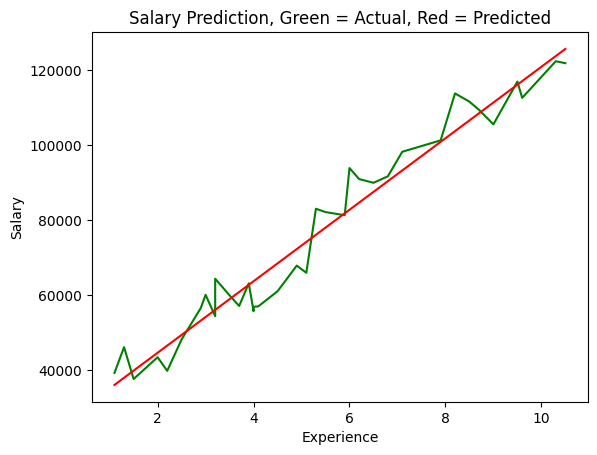

In [126]:
plt.plot(x,y, color="green")
plt.plot(x,z, color="red")
plt.title("Salary Prediction, Green = Actual, Red = Predicted")
plt.xlabel("Experience")
plt.ylabel("Salary")

In [127]:
score = reg.score(x,y)
accuracy = score * 100
accuracy

95.58814451799361

In [128]:
r2_score(y, reg.predict(x))

0.9558814451799361